In [92]:
import pandas as pd 
import numpy as np 

import os 
import sys 

from glob import glob 
from tqdm import tqdm 

import geopandas as gpd 
import matplotlib.pyplot as plt 

import osmnx as ox 


# enable latex plotting 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from shapely import wkt

import fiona 

In [93]:
og_points = pd.read_csv("/share/ju/urban-fingerprinting/notebooks/street_flooding/alt_evaluation/analysis_set.csv")

In [94]:
entire_sep29 = pd.read_csv("../notebooks/cambrian/entire_sep29_all.csv", engine='pyarrow')
entire_sep29['frame_id'] = entire_sep29['image_path'].apply(lambda x: x.split('/')[-1].split('.')[0])
entire_sep29

sep29_md = pd.read_csv("/share/ju/urban-fingerprinting/output/default/df/2023-09-29/md.csv", engine='pyarrow')
sep29_md['frame_id'] = sep29_md['frame_id'].apply(lambda x: "nlbx_"+x)

entire_sep29 = entire_sep29.merge(sep29_md, on='frame_id', how='left')
entire_sep29 


,image_path,q1,q2,response_1,response_2,Unnamed: 0.1,sentiment_1,sentiment_2,frame_id,,...,frame_quality,frame_context,gps_info.longitude,gps_info.latitude,osm_info.osm_node_id_from,osm_info.osm_node_id_to,osm_info.road_type,h3_12,h3_index_res06,geometry
0,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","No, the street in the image does not appear to...",NaN,0,0,nlbx_6bc60df5f33f5cf2294496d9f27502f3,27441,...,0.808489,DAYLIGHT,-73.806506,40.684274,457016478,457016301,MOTORWAY,6.312439e+17,604222337365049343,POINT (1037914.8488908316 188635.4293980736)
1,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","Yes, the street in the image appears to be flo...",NaN,0,1,nlbx_dcea5a8493728ed92e82076cb314e2f5,45209,...,0.851481,DAYLIGHT,-73.930518,40.726082,476025206,3625774126,MOTORWAY,6.312439e+17,604222325017018367,POINT (1003508.4653498518 203815.65841768935)
2,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","No, the street in the image does not appear to...",NaN,0,0,nlbx_c47a062296042caf805fe95df112d979,31287,...,0.852680,DAYLIGHT,-73.925759,40.693678,5713857018,42513748,RESIDENTIAL,6.312439e+17,604222325151236095,POINT (1004837.5532780958 192010.97301197928)
3,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","No, the street in the image is not flooded. Th...",NaN,0,0,nlbx_09dd1bcb9e346df3856f2172e610e396,38778,...,0.634459,DAYLIGHT,-73.900465,40.675565,2954866507,597748738,PRIMARY,6.312439e+17,604222324882800639,POINT (1011859.2757600138 185418.8478039726)
4,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...",The street in the image does not appear to be ...,NaN,0,0,nlbx_12fca2907ef5099853aebd182a237ab3,104281,...,0.695070,DAYLIGHT,-73.936680,40.733025,6721052064,6721346264,SECONDARY,6.312439e+17,604222325017018367,POINT (1001798.6941026964 206343.9155463462)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926207,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...",The street in the image does not appear to be ...,4.0,0,0,nlbx_9d821c282c02e6ec3ba98777b32824ee,10166,...,0.638714,DAYLIGHT,-74.001193,40.761838,8765412915,247119598,TRUNK,6.312439e+17,604222352128999423,POINT (983919.4335155982 216835.04881425784)
926208,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","Yes, the street appears to be flooded, as evid...",3.0,0,1,nlbx_37786df8890401b51100039725ab1d7a,9480,...,0.732835,DAYLIGHT,-73.906879,40.850322,4635132293,2028328034,SECONDARY,6.312439e+17,604222324345929727,POINT (1010012.411625123 249086.57066559608)
926209,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","No, the street in the image does not appear to...",2.0,0,0,nlbx_ca3fa4d857b65d1cae2725df78f6060b,22807,...,0.719452,DAYLIGHT,-73.925765,40.846520,60919832,7899151325,MOTORWAY,6.312439e+17,604222324345929727,POINT (1004788.6610251212 247696.35960838132)
926210,/share/ju/nexar_data/training_datasets/street_...,Does this image show more 

In [95]:
entire_sep29 = gpd.GeoDataFrame(entire_sep29, geometry=wkt.loads(entire_sep29['geometry']), crs='EPSG:2263')

In [96]:
entire_sep29

,image_path,q1,q2,response_1,response_2,Unnamed: 0.1,sentiment_1,sentiment_2,frame_id,,...,frame_quality,frame_context,gps_info.longitude,gps_info.latitude,osm_info.osm_node_id_from,osm_info.osm_node_id_to,osm_info.road_type,h3_12,h3_index_res06,geometry
0,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","No, the street in the image does not appear to...",NaN,0,0,nlbx_6bc60df5f33f5cf2294496d9f27502f3,27441,...,0.808489,DAYLIGHT,-73.806506,40.684274,457016478,457016301,MOTORWAY,6.312439e+17,604222337365049343,POINT (1037914.849 188635.429)
1,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","Yes, the street in the image appears to be flo...",NaN,0,1,nlbx_dcea5a8493728ed92e82076cb314e2f5,45209,...,0.851481,DAYLIGHT,-73.930518,40.726082,476025206,3625774126,MOTORWAY,6.312439e+17,604222325017018367,POINT (1003508.465 203815.658)
2,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","No, the street in the image does not appear to...",NaN,0,0,nlbx_c47a062296042caf805fe95df112d979,31287,...,0.852680,DAYLIGHT,-73.925759,40.693678,5713857018,42513748,RESIDENTIAL,6.312439e+17,604222325151236095,POINT (1004837.553 192010.973)
3,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","No, the street in the image is not flooded. Th...",NaN,0,0,nlbx_09dd1bcb9e346df3856f2172e610e396,38778,...,0.634459,DAYLIGHT,-73.900465,40.675565,2954866507,597748738,PRIMARY,6.312439e+17,604222324882800639,POINT (1011859.276 185418.848)
4,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...",The street in the image does not appear to be ...,NaN,0,0,nlbx_12fca2907ef5099853aebd182a237ab3,104281,...,0.695070,DAYLIGHT,-73.936680,40.733025,6721052064,6721346264,SECONDARY,6.312439e+17,604222325017018367,POINT (1001798.694 206343.916)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926207,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...",The street in the image does not appear to be ...,4.0,0,0,nlbx_9d821c282c02e6ec3ba98777b32824ee,10166,...,0.638714,DAYLIGHT,-74.001193,40.761838,8765412915,247119598,TRUNK,6.312439e+17,604222352128999423,POINT (983919.434 216835.049)
926208,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","Yes, the street appears to be flooded, as evid...",3.0,0,1,nlbx_37786df8890401b51100039725ab1d7a,9480,...,0.732835,DAYLIGHT,-73.906879,40.850322,4635132293,2028328034,SECONDARY,6.312439e+17,604222324345929727,POINT (1010012.412 249086.571)
926209,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","No, the street in the image does not appear to...",2.0,0,0,nlbx_ca3fa4d857b65d1cae2725df78f6060b,22807,...,0.719452,DAYLIGHT,-73.925765,40.846520,60919832,7899151325,MOTORWAY,6.312439e+17,604222324345929727,POINT (1004788.661 247696.360)
926210,/share/ju/nexar_data/training_datasets/street_...,Does this image show more than a foot of stand...,Is the street in this image flooded?,"No, the image does not show more than a foot o...","No

In [97]:
sep29_positives = entire_sep29[entire_sep29['sentiment_1'] == 1]

In [98]:
analysis_set = pd.read_csv("../data/processed/flooding_ct_dataset.csv")

In [99]:
inferred_p_y = pd.read_csv("../data/processed/inferred_p_y.csv")

In [100]:
analysis_set['inferred_p_y'] = inferred_p_y['inferred_p_y']

In [101]:
nyc_ct = gpd.read_file('../data/ct_nyc/nyct2020_24c/nyct2020.shp')
nyc_ct = nyc_ct.to_crs(2263)

In [102]:
analysis_set

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area,geometry,n_total,n_classified_positive,n_annotated_positive,n_annotated_negative,inferred_p_y
0,1.00,1,Manhattan,100,1000100,0,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,4121,11023.048472,1.844421e+06,MULTIPOLYGON (((972081.7880249023 190733.46704...,0.0,0.0,0.0,0.0,0.002702
1,2.01,1,Manhattan,201,1000201,0,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4103,8010.305397,1.887578e+06,"POLYGON ((988012.6597900391 196152.4838256836,...",320.0,0.0,0.0,0.0,0.001976
2,6.00,1,Manhattan,600,1000600,0,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,4103,9372.015493,4.429331e+06,POLYGON ((986961.1854248047 199553.64318847656...,845.0,2.0,1.0,1.0,0.003537
3,14.01,1,Manhattan,1401,1001401,0,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,4103,5075.332033,1.006116e+06,"POLYGON ((987382.0762329102 199473.7601928711,...",182.0,0.0,0.0,0.0,0.002203
4,14.02,1,Manhattan,1402,1001402,0,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4103,4459.156128,1.226206e+06,"POLYGON ((988536.641784668 200278.5239868164, ...",771.0,0.0,0.0,1.0,0.001544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,176.00,5,Staten Island,17600,5017600,0,Annadale-Huguenot-Prince's Bay-Woodrow,SI0304,SI03,SI03 South Shore (CD 3 Approximation),36085017600,4503,33259.444647,5.820851e+07,"POLYGON ((938074.526184082 134571.5903930664, ...",76.0,0.0,0.0,0.0,0.001278
2323,228.02,5,Staten Island,22802,5022802,0,Freshkills Park (North),SI0291,SI02,SI02 Mid-Island (CD 2 Approximation),36085022802,4502,44266.026098,6.815375e+07,POLYGON ((938205.2739868164 154530.76879882812...,204.0,1.0,0.0,0.0,0.002073
2324,291.02,5,Staten Island,29102,5029102,0,New Springville-Willowbrook-Bulls Head-Travis,SI0204,SI02,SI02 Mid-Island (CD 2 Approximation),36085029102,4502,55873.335929,1.175749e+08,"POLYGON ((932410.623840332 168847.92083740234,...",1264.0,0.0,0.0,1.0,0.004397
2325,161.00,2,Bronx,16100,2016100,0,Crotona Park East,BX0303,BX03,BX03 Morrisania-Crotona Park East (CD 3 Approx...,36005016100,4263,6476.483410,2.574284e+06,POLYGON ((1015839.3388061523 245295.0430297851...,264.0,0.0,0.0,0.0,NaN


In [103]:
analysis_set = gpd.GeoDataFrame(analysis_set, geometry=analysis_set.geometry.apply(lambda x: wkt.loads(x)), crs='EPSG:2263')
analysis_set

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area,geometry,n_total,n_classified_positive,n_annotated_positive,n_annotated_negative,inferred_p_y
0,1.00,1,Manhattan,100,1000100,0,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,4121,11023.048472,1.844421e+06,"MULTIPOLYGON (((972081.788 190733.467, 972184....",0.0,0.0,0.0,0.0,0.002702
1,2.01,1,Manhattan,201,1000201,0,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4103,8010.305397,1.887578e+06,"POLYGON ((988012.660 196152.484, 987984.769 19...",320.0,0.0,0.0,0.0,0.001976
2,6.00,1,Manhattan,600,1000600,0,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,4103,9372.015493,4.429331e+06,"POLYGON ((986961.185 199553.643, 987206.139 19...",845.0,2.0,1.0,1.0,0.003537
3,14.01,1,Manhattan,1401,1001401,0,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,4103,5075.332033,1.006116e+06,"POLYGON ((987382.076 199473.760, 987206.139 19...",182.0,0.0,0.0,0.0,0.002203
4,14.02,1,Manhattan,1402,1001402,0,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4103,4459.156128,1.226206e+06,"POLYGON ((988536.642 200278.524, 988404.814 19...",771.0,0.0,0.0,1.0,0.001544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,176.00,5,Staten Island,17600,5017600,0,Annadale-Huguenot-Prince's Bay-Woodrow,SI0304,SI03,SI03 South Shore (CD 3 Approximation),36085017600,4503,33259.444647,5.820851e+07,"POLYGON ((938074.526 134571.590, 938187.252 13...",76.0,0.0,0.0,0.0,0.001278
2323,228.02,5,Staten Island,22802,5022802,0,Freshkills Park (North),SI0291,SI02,SI02 Mid-Island (CD 2 Approximation),36085022802,4502,44266.026098,6.815375e+07,"POLYGON ((938205.274 154530.769, 937703.178 15...",204.0,1.0,0.0,0.0,0.002073
2324,291.02,5,Staten Island,29102,5029102,0,New Springville-Willowbrook-Bulls Head-Travis,SI0204,SI02,SI02 Mid-Island (CD 2 Approximation),36085029102,4502,55873.335929,1.175749e+08,"POLYGON ((932410.624 168847.921, 932435.091 16...",1264.0,0.0,0.0,1.0,0.004397
2325,161.00,2,Bronx,16100,2016100,0,Crotona Park East,BX0303,BX03,BX03 Morrisania-Crotona Park East (CD 3 Approx...,36005016100,4263,6476.483410,2.574284e+06,"POLYGON ((1015839.339 245295.043, 1016167.845 ...",264.0,0.0,0.0,0.0,NaN


In [104]:
nyc_311 = pd.read_csv('/share/ju/urban-fingerprinting/data/geo/311_Service_Requests_from_2010_to_Present.csv', engine='pyarrow')

In [105]:
nyc_311['Created Date'] = pd.to_datetime(nyc_311['Created Date'])

In [106]:
# filter for sep 29 2023 complaints 
nyc_311 = nyc_311[nyc_311['Created Date'].dt.date == pd.to_datetime('2023-09-29').date()]

In [107]:
nyc_311 = gpd.GeoDataFrame(nyc_311, geometry=gpd.points_from_xy(nyc_311.Longitude, nyc_311.Latitude), crs='EPSG:4326')
nyc_311 = nyc_311.to_crs(2263)

In [108]:
flooding_descs = ["Street Flooding (SJ)", "Manhole Overflow (Use Comments) (SA1)", "Catch Basin Clogged/Flooding (Use Comments) (SC)"] 
nyc_311 = nyc_311[nyc_311['Descriptor'].isin(flooding_descs)]



In [109]:
# how many 311 complaints? 
nyc_311['Created Date'].describe()

count                             1048
mean     2023-09-29 11:43:06.870229248
min                2023-09-29 00:05:00
25%                2023-09-29 09:14:00
50%                2023-09-29 10:47:00
75%                2023-09-29 13:53:00
max                2023-09-29 23:38:00
Name: Created Date, dtype: object

In [110]:
# FLOODNET 
floodnet_sensor = pd.read_csv('/share/ju/urban-fingerprinting/data/nyc_flooding/floodnet-flood-sensor-sep-2023.csv', engine='pyarrow')
floodnet_tide = pd.read_csv('/share/ju/urban-fingerprinting/data/nyc_flooding/floodnet-tide-sep-2023.csv', engine='pyarrow')
floodnet_weather = pd.read_csv('/share/ju/urban-fingerprinting/data/nyc_flooding/floodnet-weather-sep-2023.csv', engine='pyarrow')


In [111]:
# how many unique sensors in each dataset
print("Floodnet Sensor", floodnet_sensor['deployment_id'].nunique())
print("Floodnet Tide", floodnet_tide['sensor_id'].nunique())
print("Floodnet Weather", floodnet_weather['sensor_id'].nunique())

Floodnet Sensor 67
Floodnet Tide 10
Floodnet Weather 16


In [112]:
all_floodnet_sensors_geo = pd.concat([floodnet_sensor.groupby('deployment_id').first()[['lat','lon']].reset_index(), floodnet_tide.groupby('sensor_id').first()[['lat','lon']].reset_index(), floodnet_weather.groupby('sensor_id').first()[['lat','lon']].reset_index()], axis=0)

all_floodnet_sensor_geo = gpd.GeoDataFrame(all_floodnet_sensors_geo, geometry=gpd.points_from_xy(all_floodnet_sensors_geo.lon, all_floodnet_sensors_geo.lat), crs='EPSG:4326').to_crs(2263)

In [113]:
# DEP STORMWATER 
MODERATE_CURRENT_CONDITIONS = '/share/ju/urban-fingerprinting/data/nyc_flooding/dep_stormwater_moderate_current/data.gdb'
moderate_current_conditions_layer = 'NYC_Stormwater_Flood_Map_Moderate_Flood_with_Current_Sea_Levels'

moderate_current_conditions = gpd.read_file(MODERATE_CURRENT_CONDITIONS, layer=moderate_current_conditions_layer).to_crs(2263)
moderate_current_conditions.describe()


,Flooding_Category,Shape_Length,Shape_Area
count,2.000000,2.000000e+00,2.000000e+00
mean,1.500000,4.528920e+06,6.028541e+07
std,0.707107,2.725631e+06,2.699408e+07
min,1.000000,2.601608e+06,4.119771e+07
25%,1.250000,3.565264e+06,5.074156e+07
50%,1.500000,4.528920e+06,6.028541e+07
75%,1.750000,5.492577e+06,6.982926e+07
max,2.000000,6.456233e+06,7.937311e+07


In [114]:
nyc_ct

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area,geometry
0,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,4121,10833.043929,1.843005e+06,"MULTIPOLYGON (((972081.788 190733.467, 972184...."
1,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4103,4754.495247,9.723121e+05,"POLYGON ((988548.218 197770.375, 987978.808 19..."
2,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,4103,6976.286215,2.582705e+06,"POLYGON ((986961.185 199553.643, 987206.139 19..."
3,14.01,1,Manhattan,001401,1001401,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,4103,5075.332000,1.006117e+06,"POLYGON ((987475.016 200297.218, 987705.443 20..."
4,14.02,1,Manhattan,001402,1001402,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4103,4459.156019,1.226206e+06,"POLYGON ((988387.669 201258.312, 988621.002 20..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,176,5,Staten Island,017600,5017600,None,Annadale-Huguenot-Prince's Bay-Woodrow,SI0304,SI03,SI03 South Shore (CD 3 Approximation),36085017600,4503,26056.597520,3.569832e+07,"POLYGON ((939396.368 132182.901, 939532.522 13..."
2321,228.02,5,Staten Island,022802,5022802,None,Freshkills Park (North),SI0291,SI02,SI02 Mid-Island (CD 2 Approximation),36085022802,4502,44266.026025,6.815375e+07,"POLYGON ((937821.590 158672.978, 937700.899 15..."
2322,291.02,5,Staten Island,029102,5029102,None,New Springville-Willowbrook-Bulls Head-Travis,SI0204,SI02,SI02 Mid-Island (CD 2 Approximation),36085029102,4502,58694.561770,1.062361e+08,"POLYGON ((937409.633 165643.463, 937393.891 16..."
2323,161,2,Bronx,016100,2016100,None,Crotona Park East,BX0303,BX03,BX03 Morrisania-Crotona Park East (CD 3 Approx...,36005016100,4263,6476.484228,2.574284e+06,"POLYGON ((1016899.335 244402.689, 1016891.875 ..."


In [115]:
ct_enriched = nyc_ct.copy() 



ct_enriched.describe()

,Shape_Leng,Shape_Area
count,2325.000000,2.325000e+03
mean,8452.504534,3.622796e+06
std,7559.653752,7.163449e+06
min,2569.477865,4.005503e+05
25%,5539.379109,1.631792e+06
50%,6459.690172,1.964157e+06
75%,8723.379390,3.087463e+06
max,148864.816761,1.971899e+08


In [116]:
# get nearest 311 complaint to each tract 
ct_enriched = gpd.sjoin_nearest(ct_enriched, nyc_311, distance_col='nearest_report_to_ct')
# drop index_left, index_right, dont fail if they dont exist
ct_enriched.drop(columns=['index_right'], errors='ignore', inplace=True)



In [117]:
# get nearest floodnet sensor to each tract
ct_enriched = gpd.sjoin_nearest(ct_enriched, all_floodnet_sensor_geo, distance_col='nearest_sensor_to_ct')
# drop index_left, index_right, dont fail if they dont exist
ct_enriched.drop(columns=['index_right'], errors='ignore', inplace=True)

In [118]:
ct_enriched['nearest_sensor_to_ct'].describe()

count     3010.000000
mean      6217.256657
std       4856.306852
min          0.000000
25%       2448.784037
50%       5366.140734
75%       9018.487560
max      28187.069626
Name: nearest_sensor_to_ct, dtype: float64

In [119]:
# get nearest '1' flooding area to each tract
stormwater_filter = moderate_current_conditions['Flooding_Category'] == 1
ct_enriched = gpd.sjoin_nearest(ct_enriched, moderate_current_conditions[stormwater_filter], distance_col='nearest_nuisance_flooding_area_to_ct')
# drop index_left, index_right, dont fail if they dont exist
ct_enriched.drop(columns=['index_right'], errors='ignore', inplace=True)

# get nearest '2' flooding area to each tract
stormwater_filter = moderate_current_conditions['Flooding_Category'] == 2
ct_enriched = gpd.sjoin_nearest(ct_enriched, moderate_current_conditions[stormwater_filter], distance_col='nearest_deep_flooding_area_to_ct')
# drop index_left, index_right, dont fail if they dont exist
ct_enriched.drop(columns=['index_right'], errors='ignore', inplace=True)


In [120]:
ct_enriched['nearest_nuisance_flooding_area_to_ct'].describe()

count     3010.000000
mean       341.002075
std        773.049660
min          0.000000
25%          0.000000
50%          0.000000
75%        406.895513
max      11490.928289
Name: nearest_nuisance_flooding_area_to_ct, dtype: float64

In [121]:
nyc_311 = gpd.sjoin_nearest(nyc_311, nyc_ct, distance_col='nearest_complaint_to_ct')
# drop index_right 
nyc_311.drop(columns=['index_right'], inplace=True)



In [122]:
# drop duplicate rows on CTLabel
ct_enriched = ct_enriched.drop_duplicates(subset='GEOID')

In [123]:
# count complaints per ct
ct_enriched['n_complaints'] = ct_enriched['CTLabel'].map(nyc_311.groupby('CTLabel').size()).fillna(0)

# count frames per ct 


In [124]:
analysis_set['CTLabel'] = analysis_set['CTLabel'].apply(lambda x: str(x))
inferred_p_y_by_ct = analysis_set.groupby('CTLabel')['inferred_p_y'].mean().reset_index()
# merge with ct_enriched
ct_enriched = ct_enriched.merge(inferred_p_y_by_ct, left_on='CTLabel', right_on='CTLabel', how='left')
# fill na with 0
ct_enriched['inferred_p_y'] = ct_enriched['inferred_p_y'].fillna(0)

# count frames per ct 
TOP_N_TO_SELECT = 393
# if inferred_p_y is in the top N, then mark classified_positive as 1. else 0 
ct_enriched['classified_positive'] = ct_enriched['inferred_p_y'].rank(ascending=False, method='first') <= TOP_N_TO_SELECT

In [125]:
ct_enriched

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,...,Shape_Length_left,Shape_Area_right,nearest_nuisance_flooding_area_to_ct,Flooding_Category_right,Shape_Length_right,Shape_Area,nearest_deep_flooding_area_to_ct,n_complaints,inferred_p_y,classified_positive
0,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),...,6.456233e+06,7.937311e+07,7281.645501,2,2.601608e+06,4.119771e+07,7330.146246,0.0,0.000000,False
1,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,6.456233e+06,7.937311e+07,295.491798,2,2.601608e+06,4.119771e+07,830.903832,0.0,0.001976,False
2,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,6.456233e+06,7.937311e+07,0.000000,2,2.601608e+06,4.119771e+07,0.000000,2.0,0.000000,False
3,14.01,1,Manhattan,001401,1001401,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,6.456233e+06,7.937311e+07,569.792906,2,2.601608e+06,4.119771e+07,587.413436,0.0,0.002203,False
4,14.02,1,Manhattan,001402,1001402,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,6.456233e+06,7.937311e+07,0.000000,2,2.601608e+06,4.119771e+07,0.000000,0.0,0.001544,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,176,5,Staten Island,017600,5017600,None,Annadale-Huguenot-Prince's Bay-Woodrow,SI0304,SI03,SI03 South Shore (CD 3 Approximation),...,6.456233e+06,7.937311e+07,0.000000,2,2.601608e+06,4.119771e+07,0.000000,0.0,0.000000,False
2321,228.02,5,Staten Island,022802,5022802,None,Freshkills Park (North),SI0291,SI02,SI02 Mid-Island (CD 2 Approximation),...,6.456233e+06,7.937311e+07,0.000000,2,2.601608e+06,4.119771e+07,0.000000,1.0,0.002073,False
2322,291.02,5,Staten Island,029102,5029102,None,New Springville-Willowbrook-Bulls Head-Travis,SI0204,SI02,SI02 Mid-Island (CD 2 Approximation),...,6.456233e+06,7.937311e+07,0.000000,2,2.601608e+06,4.119771e+07,1014.805802,0.0,0.004397,True
2323,161,2,Bronx,016100,2016100,None,Crotona Park East,BX0303,BX03,BX03 Morrisania-Crotona Park East (CD 3 Approx...,...,6.456233e+06,7.937311e+07,0.000000,2,2.601608e+06,4.119771e+07,0.000000,1.0,0.000000,False


In [126]:
# decsribe distribution of tracts with no complaints, nearest_complaint_to_ct
ct_enriched['nearest_report_to_ct'].describe()

count    2325.000000
mean      933.232033
std      1156.987173
min         0.000000
25%         0.471996
50%       566.209914
75%      1371.315995
max      7945.051165
Name: nearest_report_to_ct, dtype: float64

In [127]:
ct_enriched['BoroName'].unique()

array(['Manhattan', 'Bronx', 'Queens', 'Staten Island', 'Brooklyn'],
      dtype=object)

<Axes: >

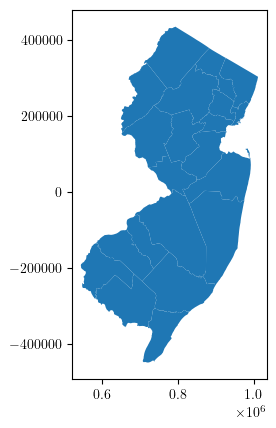

In [128]:
# load nj 
nj_counties = gpd.read_file('/share/ju/urban-fingerprinting/data/geo/nj/nj_counties/NJ_Counties_3424.shp')
nj_counties = nj_counties.to_crs(2263)

nj_counties.plot()

In [129]:
nyc_roads = ox.load_graphml('/share/ju/urban-fingerprinting/data/geo/nyc.graphml')
# convert to gdf 
nyc_roads = ox.graph_to_gdfs(nyc_roads, nodes=False, edges=True)
nyc_roads.set_crs('EPSG:2263')

osmid  \
u           v           key                                              
39076461    42854803    0                                     25161578   
            274283981   0                        [122633397, 25161349]   
42854803    42847609    0                                     25161438   
            42816655    0                                     25161438   
274283981   3789687872  0    [39084897, 40944009, 420749860, 40944010]   
...                                                                ...   
11079773974 11079773975 1                                      5711712   
11079773975 11079773973 0                                      5711712   
            11079773974 0                                   1193666850   
                        1                                      5711712   
11146344837 42488118    0                                   1202320669   

                             oneway        highway reversed   length  \
u           v           key                                            
39076461    42854803    0      True  motorway_link    False  254.709   
            274283981   0      True       motorway    False  767.800   
42854803    42847609    0     False       tertiary    False  143.257   
            42816655    0     False       tertiary     True  140.936   
274283981   3789687872  0      True       motorway    False  675.154   
...                             ...            ...      ...      ...   
11079773974 11079773975 1     False    residential    False   40.679   
11079773975 11079773973 0     False    residential    False   29.190   
            11079773974 0     False    residential     True   17.361   
                        1     False    residential     True   40.679   
11146344837 42488118    0      True    residential    False    9.260   

                                                                      geometry  \
u           v           key                                                      
39076461    42854803    0    LINESTRING (1041122.091 225853.939, 1041402.84...   
            274283981   0    LINESTRING (1041122.091 225853.939, 1041548.17...   
42854803    42847609    0    LINESTRING (1041868.133 226128.733, 1041991.35...   
            42816655    0    LINESTRING (1041868.133 226128.733, 1041841.86...   
274283981   3789687872  0    LINESTRING (1043391.463 226914.228, 1043507.41...   
...                                                                        ...   
11079773974 11079773975 1    LINESTRING (940039.804 170343.593, 940038.547 ...   
11079773975 11079773973 0    LINESTRING (940096.779 170339.774, 940099.783 ...   
            11079773974 0    LINESTRING (940096.779 170339.774, 940039.804 ...   
                        1    LINESTRING (940096.779 170339.774, 940095.925 ...   
11146344837 42488118    0    LINESTRING (996882.176 202751.273, 996858.522 ...   

                            lanes  ref                  name maxspeed bridge  \
u           v           key                                                    
39076461    42854803    0     NaN  NaN                   NaN      NaN    NaN   
            274283981   0       2   CI  Cross Island Parkway   50 mph    NaN   
42854803    42847609    0     NaN  NaN  Cross Island Parkway      NaN    NaN   
            42816655    0     NaN  NaN  Cross Island Parkway      NaN    NaN   
274283981   3789687872  0       3   CI  Cross Island Parkway   50 mph    yes   
...                           ...  ...                   ...      ...    ...   
11079773974 11079773975 1     NaN  NaN           Bush Avenue      NaN    NaN   
11079773975 11079773973 0     NaN  NaN           Bush Avenue      NaN    NaN   
            11079773974 0     NaN  NaN                   NaN      NaN    NaN   
                        1     NaN  NaN           Bush Avenue      NaN    NaN   
11146344837 42488118    0       1  NaN     North 15th Street   25 mph    NaN   

                            access junction tunnel width 

In [130]:
moderate_current_conditions.geometry

0    MULTIPOLYGON Z (((917257.748 120888.120 0.000,...
1    MULTIPOLYGON Z (((917182.612 120877.544 0.000,...
Name: geometry, dtype: geometry

In [131]:
ct_enriched['inferred_p_y_percentile'] = ct_enriched['inferred_p_y'].rank(pct=True)

In [132]:
ct_enriched.describe()

,Shape_Leng,Shape_Area_left,Unique Key,Created Date,BBL,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Zip Codes,...,Shape_Length_left,Shape_Area_right,nearest_nuisance_flooding_area_to_ct,Flooding_Category_right,Shape_Length_right,Shape_Area,nearest_deep_flooding_area_to_ct,n_complaints,inferred_p_y,inferred_p_y_percentile
count,2325.000000,2.325000e+03,2.325000e+03,2325,1.835000e+03,2.325000e+03,2325.000000,2325.000000,2325.000000,2303.000000,...,2.325000e+03,2.325000e+03,2325.000000,2325.0,2.325000e+03,2.325000e+03,2325.000000,2325.000000,2325.000000,2325.000000
mean,8452.504534,3.622796e+06,5.896168e+07,2023-09-29 11:47:42.838709760,3.104355e+09,1.007501e+06,200049.452903,40.715702,-73.916086,15204.105949,...,6.456233e+06,7.937311e+07,351.123650,2.0,2.601608e+06,4.119771e+07,460.943477,0.852043,0.001028,0.500215
min,2569.477865,4.005503e+05,5.895585e+07,2023-09-29 00:05:00,1.000158e+09,9.255370e+05,129707.000000,40.522508,-74.211282,10094.000000,...,6.456233e+06,7.937311e+07,0.000000,2.0,2.601608e+06,4.119771e+07,0.000000,0.000000,0.000000,0.355914
25%,5539.379109,1.631792e+06,5.895897e+07,2023-09-29 09:17:00,2.049340e+09,9.932130e+05,176411.000000,40.650846,-73.967705,12079.000000,...,6.456233e+06,7.937311e+07,0.000000,2.0,2.601608e+06,4.119771e+07,0.000000,0.000000,0.000000,0.355914
50%,6459.690172,1.964157e+06,5.896202e+07,2023-09-29 11:08:00,3.060630e+09,1.006691e+06,196380.000000,40.705648,-73.918977,14507.000000,...,6.456233e+06,7.937311e+07,0.000000,2.0,2.601608e+06,4.119771e+07,29.918962,0.000000,0.000000,0.355914
75%,8723.379390,3.087463e+06,5.896515e+07,2023-09-29 14:20:00,4.047990e+09,1.022621e+06,219613.000000,40.769325,-73.861546,17216.000000,...,6.456233e+06,7.937311e+07,483.679800,2.0,2.601608e+06,4.119771e+07,738.384007,1.000000,0.001872,0.750108
max,148864.816761,1.971899e+08,5.896696e+07,2023-09-29 23:38:00,5.069610e+09,1.067281e+06,270431.000000,40.908904,-73.700376,24671.000000,...,6.456233e+06,7.937311e+07,11490.928289,2.0,2.601608e+06,4.119771e+07,11542.906482,27.000000,0.085086,1.000000
std,7559.653752,7.163449e+06,3.547610e+03,NaN,1.105502e+09,2.425142e+04,30485.253867,0.083670,0.087458,3785.016649,...,9.315229e-10,1.490437e-08,694.244529,0.0,0.000000e+00,0.000000e+00,776.369611,1.704139,0.003815,0.230985


In [133]:
ct_enriched['classified_positive'].value_counts()

classified_positive
False    1932
True      393
Name: count, dtype: int64

In [135]:
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Define opacity levels
NYC311_ALPHA = 1
SENSOR_ALPHA = 1
FLOODING_AREA_ALPHA = 1
VP_ALPHA = 0.7

PAIRED = True

# Custom colormap with 12 levels
colors = plt.cm.RdYlGn(np.linspace(0, 1, 40))
# reverse colors 
colors = colors[::-1]
VP_CMAP = LinearSegmentedColormap.from_list("custom_rdylgn", colors, N=256)
VP_NORM = mcolors.BoundaryNorm(boundaries=np.linspace(0, max(ct_enriched['inferred_p_y_percentile']), 40), ncolors=256)

# Basemap color
ocean = '#99b3cc'

# Boroughs to iterate through
BOROUGHS = ['', 'Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island']

for BORO in BOROUGHS:
    if BORO == '':
        ct_enriched_for_plot = ct_enriched
    else:
        ct_enriched_for_plot = ct_enriched[ct_enriched['BoroName'] == BORO]

    for i in range(1, 5):  # Iterating through layers to plot
        fig, ax = plt.subplots(figsize=(20, 20))
        
        # Always plot the first layer from analysis_set
        #ct_enriched.plot(
        #    ax=ax, 
        #    column='inferred_p_y_percentile', 
        #    cmap=VP_CMAP, 
        #    norm=VP_NORM,
        #    alpha=VP_ALPHA, 
        #    edgecolor='black', 
        #    linewidth=0.5, 
        #    zorder=2, 
        #    legend=True, 
        #    legend_kwds={
        #        'label': 'Inferred probability of flooding (Percentile)', 
        #        'orientation': 'horizontal', 
        #        'pad': 0.01, 
        #        'aspect': 50, 
        #        'shrink': 0.5, 
        #        'extend': 'neither', 
        #        'format': '%.3f'
        #    }
        #)

        # plot layer with census tracts, colored by classified_positive 
        ct_enriched_for_plot.plot(
            ax=ax, 
            column='classified_positive', 
            cmap='coolwarm', 
            alpha=0.5, 
            edgecolor='black', 
            linewidth=0.5, 
            zorder=2, 
            legend=True, 
        )

        sep29_positives.plot(ax=ax, color='red', marker='o', alpha=0.25, markersize=25, zorder=6, label='Positive Image')

        # Conditional plotting based on PAIRED setting
        if (i == 2 and PAIRED) or not PAIRED:
            all_floodnet_sensor_geo.plot(ax=ax, color='darkviolet', marker='D', alpha=SENSOR_ALPHA, markersize=56, zorder=5, label='Floodnet Sensor')
        
        if (i == 3 and PAIRED) or not PAIRED:
            nyc_311.plot(ax=ax, color='brown', marker='^', alpha=NYC311_ALPHA, markersize=52, zorder=4, label='311 Complaint')
        
        if (i == 4 and PAIRED) or not PAIRED:
            moderate_current_conditions[moderate_current_conditions['Flooding_Category'] == 1].plot(ax=ax, color=ocean, edgecolor=ocean, alpha=FLOODING_AREA_ALPHA, linewidth=2, zorder=3)
            moderate_current_conditions[moderate_current_conditions['Flooding_Category'] == 2].plot(ax=ax, edgecolor='darkblue', color='darkblue', alpha=FLOODING_AREA_ALPHA, linewidth=2, zorder=3)
            
            # Create new legend handles for custom stormwater legend
            blue_line = mlines.Line2D([], [], color=ocean, markersize=15, label='Nuisance Flooding Area')
            darkblue_line = mlines.Line2D([], [], color='darkblue', markersize=15, label='Deep Flooding Area')

            # Add the new handles to the existing ones
            existing_handles, existing_labels = ax.get_legend_handles_labels()
            updated_handles = existing_handles + [blue_line, darkblue_line]
            updated_labels = existing_labels + ['Nuisance Flooding Area', 'Deep Flooding Area']

            # Create the new legend
            legend = ax.legend(handles=updated_handles, labels=updated_labels, loc='center left', fontsize=28, scatterpoints=1, fancybox=True, framealpha=1)
        else:
            legend = ax.legend(loc='center left', fontsize=28, framealpha=1, scatterpoints=1)

        # add 'True' and 'False' labels on classified_positive legend
        # add patches 
        existing_handles, existing_labels = ax.get_legend_handles_labels()
        true_classified = mpatches.Patch(color='red', label='Tract Classified as Positive')
        false_classified = mpatches.Patch(color='blue', label='Tract Classified as Negative')
        updated_handles = existing_handles + [true_classified, false_classified]
        updated_labels = existing_labels + ['Tract Classified as Positive', 'Tract Classified as Negative']
        legend = ax.legend(handles=updated_handles, labels=updated_labels, loc='center left', fontsize=28, framealpha=1, scatterpoints=1).set_zorder(7)



        # Plotting New Jersey counties with hatch
        nj_counties.plot(ax=ax, color='white', alpha=1, zorder=1, hatch='//')

        # Adding basemap
        ctx.add_basemap(ax, crs=ct_enriched_for_plot.crs, source='https://tiles.stadiamaps.com/tiles/stamen_terrain_background/{z}/{x}/{y}{r}@2x.png?api_key=136e7590-745d-487d-80de-24b2decdac96', zorder=0)
        
        # Setting bounds
        bounds = ct_enriched_for_plot.total_bounds
        ax.set_xlim([bounds[0], bounds[2]])
        ax.set_ylim([bounds[1], bounds[3]])

        # Turn off the axes
        ax.axis('off')

        # Saving figures
        os.makedirs('maps', exist_ok=True)
        path = f'maps/nyc_flooding_map_paired_{PAIRED}_{BORO}_{i}_noagg_zoomin.png' if BORO != '' else f'maps/nyc_flooding_map_paired_{PAIRED}_{i}_noagg.png'
        plt.savefig(path, dpi=300, bbox_inches='tight', pad_inches=0.0)
        plt.close()

: 